In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import gudhi as gd
from open3d import io, visualization


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [41]:

# Path
pathToData = os.path.join(os.getcwd(), 'data', 'bags', 'bag_0')

# Read Data
pointCloud = io.read_point_cloud(os.path.join(pathToData, 'cloud_final.ply')) # Read point cloud
print(pointCloud)
pointCloudArray = np.asarray(pointCloud.points)

# Visualize point cloud
visualize = True
if visualize:
    visualization.draw_geometries([pointCloud])

# # Create alpha complex
alphaComplex = gd.AlphaComplex(points = pointCloudArray)

# # Create simplex tree object
simplexTree = alphaComplex.create_simplex_tree()

# Create persistence diagram
persistenceDiagram = simplexTree.persistence()



PointCloud with 338591 points.


KeyboardInterrupt: 

C:\Users\spier\AppData\Local\Programs\Python\Python310\lib\site-packages\gudhi\persistence_graphical_tools.py:85: UserWarning: There are 1370998 intervals given as input, whereas max_intervals is set to 1000000.
  warnings.warn(


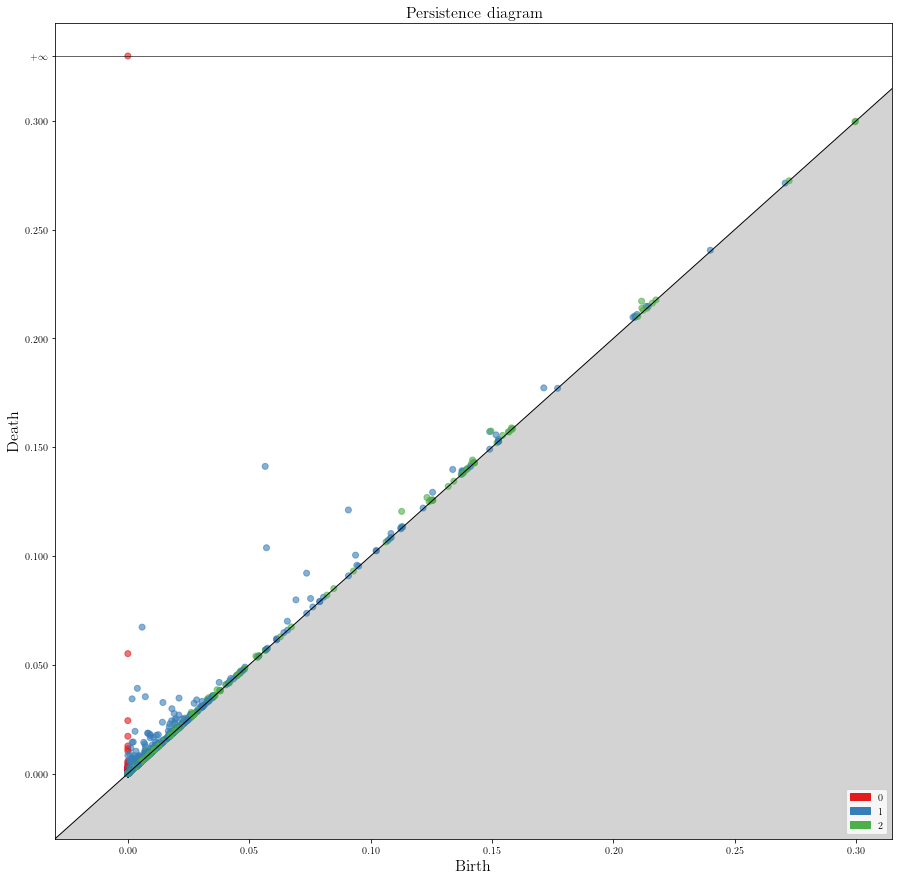

In [3]:
import matplotlib


gd.plot_persistence_diagram(persistenceDiagram, legend=True)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 15)
plt.show()

In [4]:
# print(list(simplexTree.get_filtration()))
# persistenceDiagram

import math

lastConnection = None

for p in persistenceDiagram:
    if p[0] != 0 or math.isinf(p[1][1]):
        continue
    print(p)
    lastConnection = p[1][1]
    break

# alphaComplex.get_point(1)

# for sk_value in simplexTree.get_skeleton(1):
#     print(sk_value)

# simplexTree.persistence_pairs()


connectionPoints = None

for splx in simplexTree.get_filtration() :
    if splx[1] == 0: continue
    if splx[1] != lastConnection: continue 
    connectionPoints = splx[0]
    print(splx)



# simplexTree.prune_above_filtration(lastConnection)





(0, (0.0, 0.05510144263334403))
([181801, 189856], 0.05510144263334403)


In [31]:
import numpy as np

print(connectionPoints)

c = simplexTree.copy()

# c.prune_above_filtration(lastConnection)


points = []

for sk_value in simplexTree.get_skeleton(1):

    i = sk_value[0][0]
    

    # if i > 100: break

    while len(points) != i+1:
        points.append([])
    if sk_value[1] == 0: continue

    v = sk_value[0][1]

    points[i].append(v)
    # np.insert(points[sk_value[0][0]], points[sk_value[0][1]])

# print(points)



[181801, 189856]


In [51]:

print(points[connectionPoints[0]])


for i in range(len(points)-1, 0, -1):
    for j in points[i]:
        # print(j)
        points[j].append(i)

print("done 1")

final = []
seen = []
failsafe = 500
recursions = 0

def recurse(i):
    global recursions

    if i in seen: return

    recursions = recursions + 1
    if recursions > failsafe: return
    

    seen.append(i)
    for j in points[i]:
        final.append(j)
    for j in points[i]:
        recurse(j)

recurse(connectionPoints[1])
# recurse(0)

        


# final.sort()
# print(final)

[189269, 189856, 190926, 191702, 192522, 192523, 193047]
338590
338586
338589
338590
338590
338582
338590
338581
338590
338580
338583
338590
338587
338578
338587
338590
338577
338578
338587
338590
338589
338574
338589
338573
338585
338584
338570
338584
338569
338588
338568
338577
338581
338582
338590
338579
338583
338574
338571
338572
338585
338565
338579
338583
338577
338578
338582
338587
338590
338561
338566
338577
338582
338590
338566
338576
338577
338581
338590
338576
338580
338581
338590
338564
338573
338574
338575
338563
338571
338573
338589
338567
338588
338583
338590
338554
338579
338580
338583
338590
338553
338554
338561
338582
338590
338552
338553
338561
338580
338581
338582
338590
338562
338579
338583
338550
338562
338583
338551
338559
338560
338566
338581
338582
338562
338565
338579
338583
338548
338559
338581
338590
338546
338548
338558
338580
338581
338590
338545
338546
338558
338559
338576
338590
338576
338578
338587
338590
338544
338558
338559
338576
338577
338542
33854

KeyboardInterrupt: 

In [34]:
# print(final)

import open3d as o3d

segmentedCloud = [pointCloudArray[i] for i in final]

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(segmentedCloud)

visualization.draw_geometries([pcd])
